# Scenario analysis

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
from plotter import HydroModelPlotter

Read the results of the open exploration:

In [3]:
experiments = pd.read_csv("../outputs/experiments_exploration.csv").drop(columns="Unnamed: 0")
outcomes = pd.read_csv("../outputs/outcomes_exploration.csv").drop(columns="Unnamed: 0")

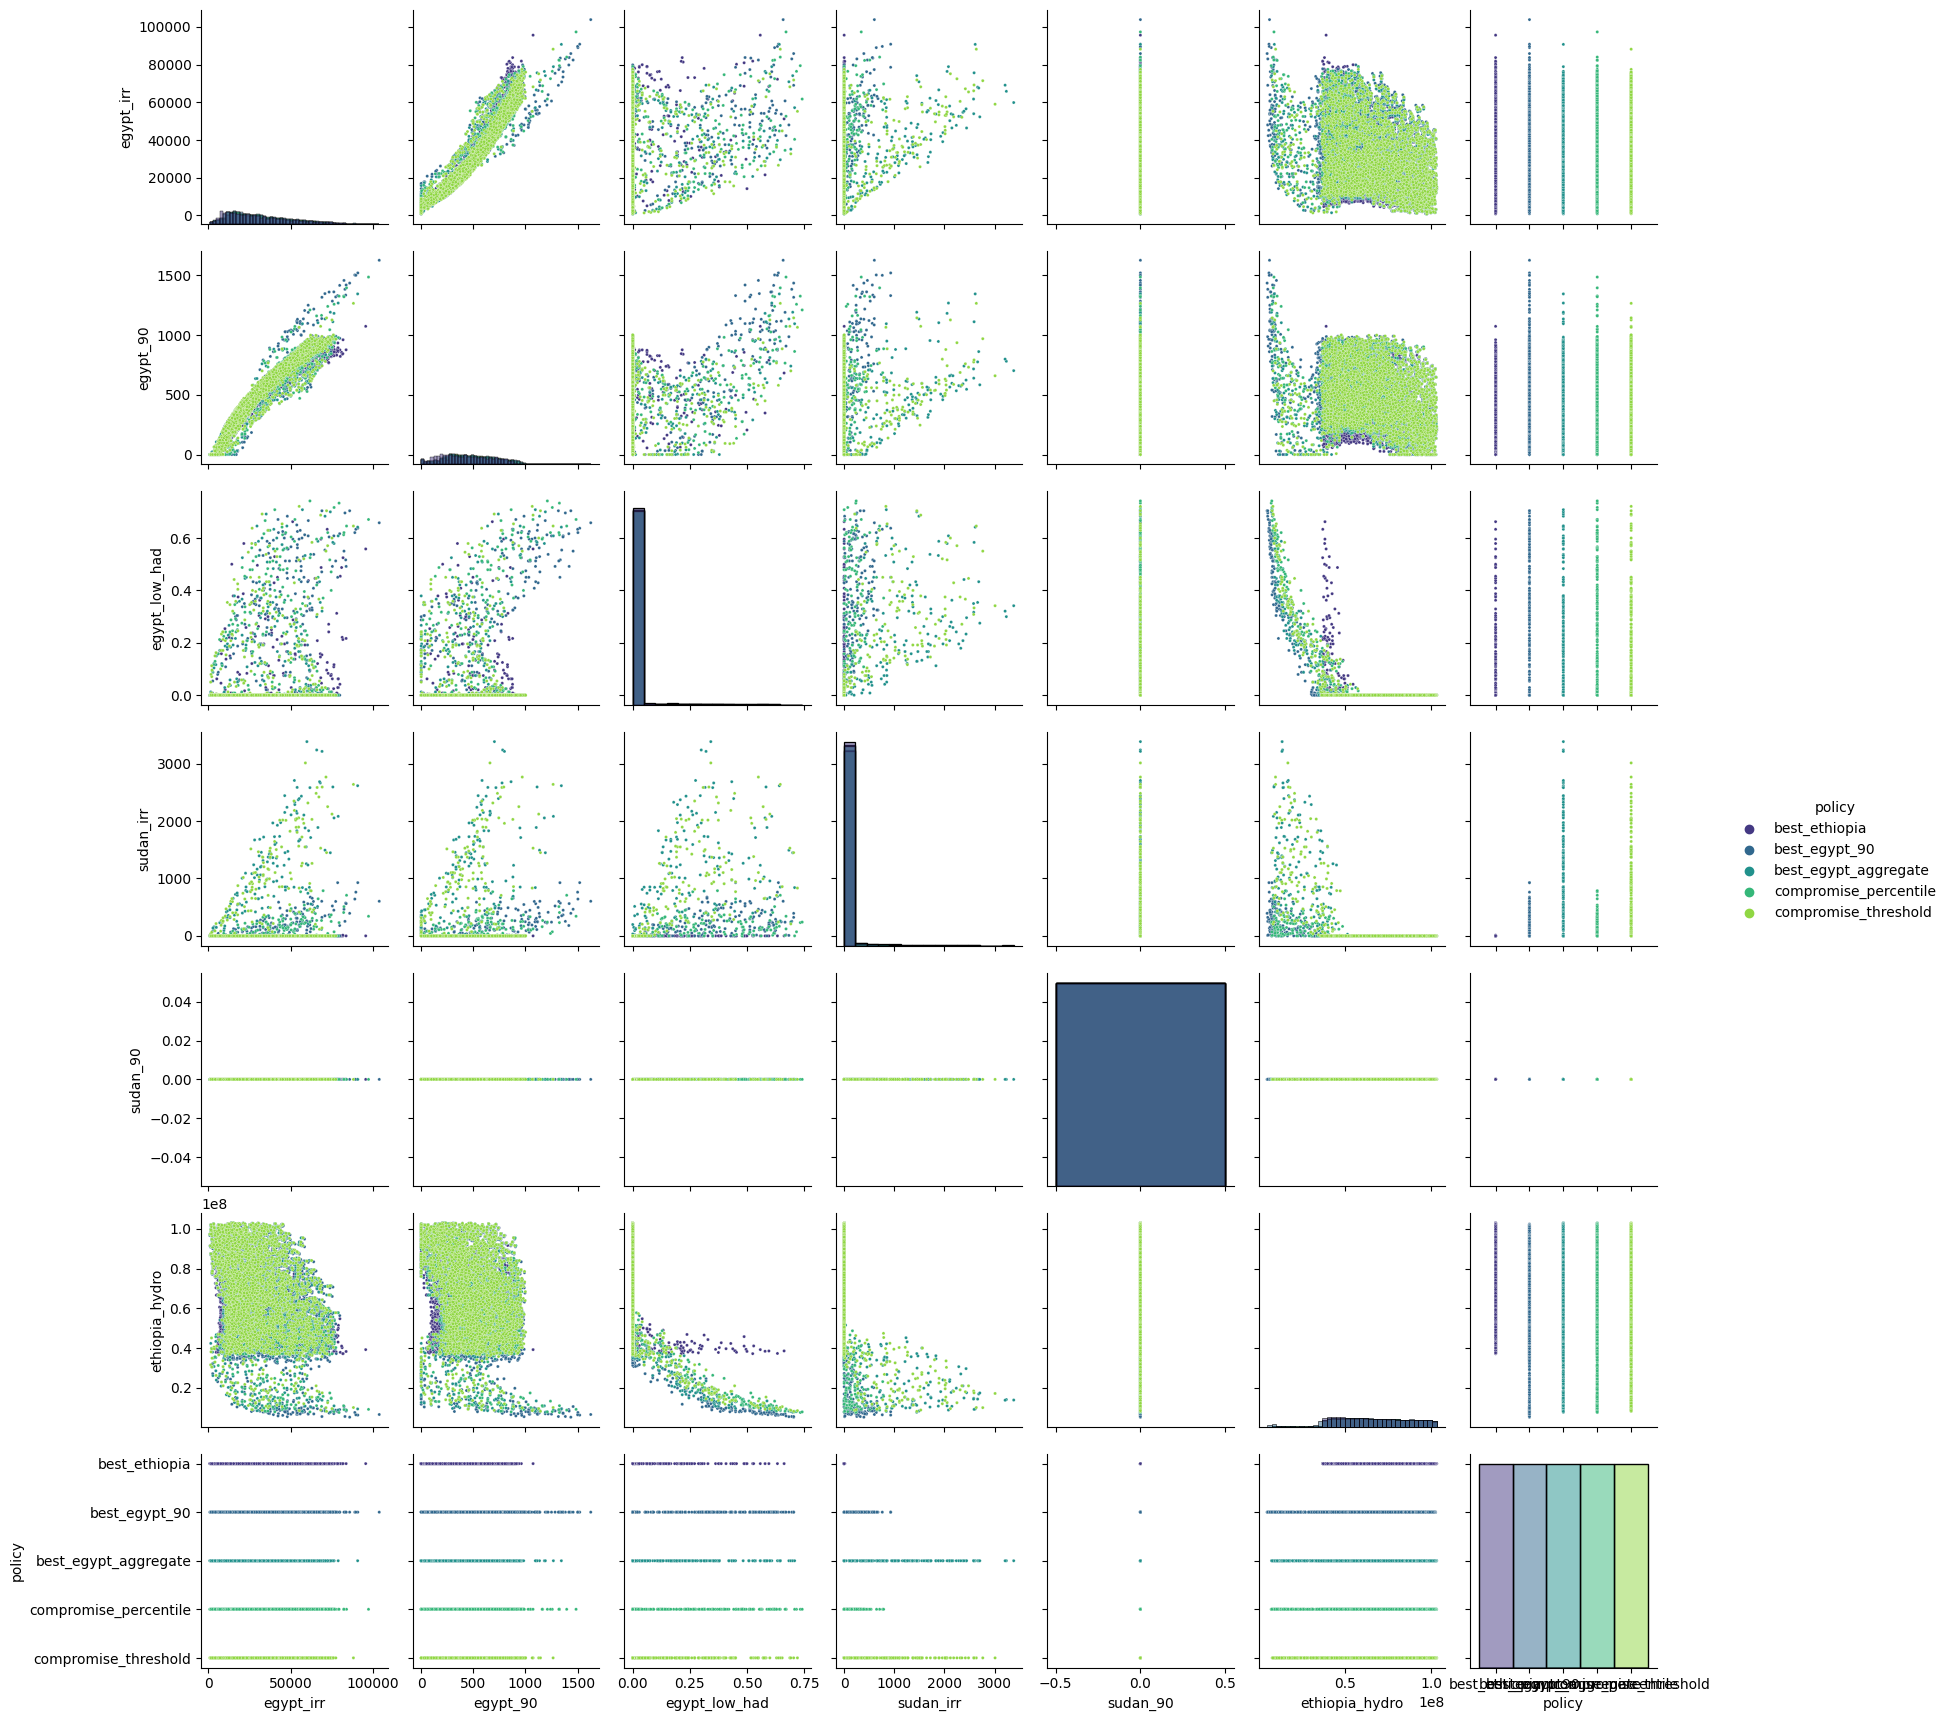

In [5]:
policies = experiments['policy']

data = outcomes
data['policy'] = policies

sns.pairplot(data, hue='policy', vars=outcomes.keys(), diag_kind='hist',plot_kws={"s": 5},palette="viridis")
plt.xticks(rotation=45)
plt.show()


In [6]:
experiments.iloc[:,:7]

,atbara_dev_coef,atbara_mean_coef,blue_nile_dev_coef,blue_nile_mean_coef,white_nile_dev_coef,white_nile_mean_coef,yearly_demand_growth_rate
0,0.900605,0.776880,1.202402,0.997331,1.267372,1.239588,0.018419
1,0.848363,1.114484,1.392142,0.893860,1.018906,0.865233,0.019154
2,1.376981,0.861442,1.180153,1.055651,0.524763,0.973695,0.012634
3,1.067817,0.777850,0.719747,0.777996,1.279631,0.912673,0.029702
4,1.225215,1.110503,1.062273,0.813643,0.750684,0.888514,0.012937
...,...,...,...,...,...,...,...
14995,0.515117,1.080099,1.337346,1.011416,0.632053,1.096909,0.017961
14996,0.734474,0.961448,0.652504,1.152160,1.443176,1.127996,0.028750
14997,1.092854,1.224335,0.868930,1.188934,1.130032,1.199540,0.025406
14998,0.801764,1.104937,0.999552,0.872480,1.338876,0.892909,0.026941


In [7]:
from ema_workbench.analysis import dimensional_stacking

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


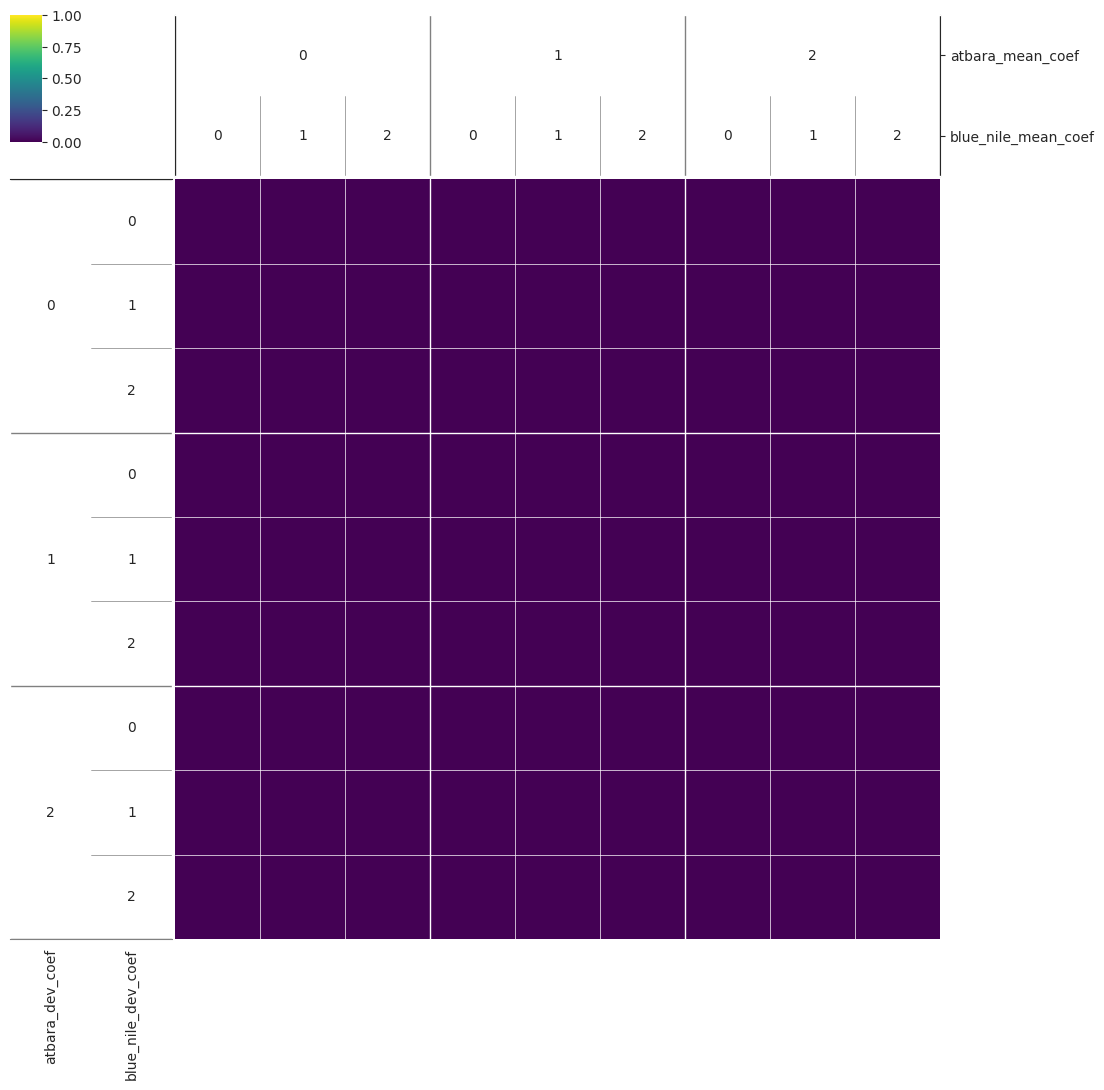

In [27]:
# from ema_workbench.analysis import dimensional_stacking

x = experiments.iloc[:,:7]
y = outcomes["sudan_irr"] < np.percentile(outcomes["sudan_irr"],95)
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12,12))
plt.show()

In [10]:
experiments.iloc[:,[0,1,2,3,4,5,6,-2]]

,atbara_dev_coef,atbara_mean_coef,blue_nile_dev_coef,blue_nile_mean_coef,white_nile_dev_coef,white_nile_mean_coef,yearly_demand_growth_rate,policy
0,0.900605,0.776880,1.202402,0.997331,1.267372,1.239588,0.018419,best_ethiopia
1,0.848363,1.114484,1.392142,0.893860,1.018906,0.865233,0.019154,best_ethiopia
2,1.376981,0.861442,1.180153,1.055651,0.524763,0.973695,0.012634,best_ethiopia
3,1.067817,0.777850,0.719747,0.777996,1.279631,0.912673,0.029702,best_ethiopia
4,1.225215,1.110503,1.062273,0.813643,0.750684,0.888514,0.012937,best_ethiopia
...,...,...,...,...,...,...,...,...
14995,0.515117,1.080099,1.337346,1.011416,0.632053,1.096909,0.017961,compromise_threshold
14996,0.734474,0.961448,0.652504,1.152160,1.443176,1.127996,0.028750,compromise_threshold
14997,1.092854,1.224335,0.868930,1.188934,1.130032,1.199540,0.025406,compromise_threshold
14998,0.801764,1.104937,0.999552,0.872480,1.338876,0.892909,0.026941,compromise_threshold


In [11]:
out_dict = dict()
for col in outcomes.iloc[:,:-1].columns:
    out_dict[col] = np.array(outcomes[col])
out_dict

{'egypt_irr': array([19335.46985414, 28478.85721375, 11998.01782076, ...,
        21024.8344492 , 62465.11904546, 19025.33942917]),
 'egypt_90': array([342.19423928, 422.72148476, 207.78173063, ..., 278.39478991,
        847.21366495, 287.60627282]),
 'egypt_low_had': array([0., 0., 0., ..., 0., 0., 0.]),
 'sudan_irr': array([0., 0., 0., ..., 0., 0., 0.]),
 'sudan_90': array([0., 0., 0., ..., 0., 0., 0.]),
 'ethiopia_hydro': array([65716373.88990152, 52855176.91826019, 73542331.4343626 , ...,
        93188152.11940996, 50418617.04717907, 99752560.31681244])}

In [13]:
from ema_workbench.analysis import feature_scoring

scores = feature_scoring.get_feature_scores_all(experiments.iloc[:,[0,1,2,3,4,5,6]], out_dict)

scores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterio

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,,,,,,
atbara_dev_coef,0.020160,0.024732,0.052877,0.066807,0.0,0.017016
atbara_mean_coef,0.022849,0.027959,0.108588,0.083699,0.0,0.018928
blue_nile_dev_coef,0.020316,0.023711,0.056257,0.065969,0.0,0.017240
blue_nile_mean_coef,0.117887,0.137771,0.379481,0.324495,0.0,0.886470
white_nile_dev_coef,0.020332,0.023047,0.058924,0.072502,0.0,0.016810
white_nile_mean_coef,0.056800,0.075677,0.281272,0.243751,0.0,0.026349
yearly_demand_growth_rate,0.741657,0.687104,0.062601,0.142777,0.0,0.017187
